# Dating Dataset Creation with a Browser

In this kernel I do some basic exploratory data analysis on the IEEE Fraud Detection dataset. The purpose of this simple notebook is to estimate the starting date of this dataset.

For that, we will analyze the timestamp `TransactionDT` provided for each transaction. `TransactionDT` is the time elapsed in second since dataset's starting date and the transaction date. We will combine this piece of data with the browser used to perform the transaction (`id_31`) to discover the dataset's starting date.

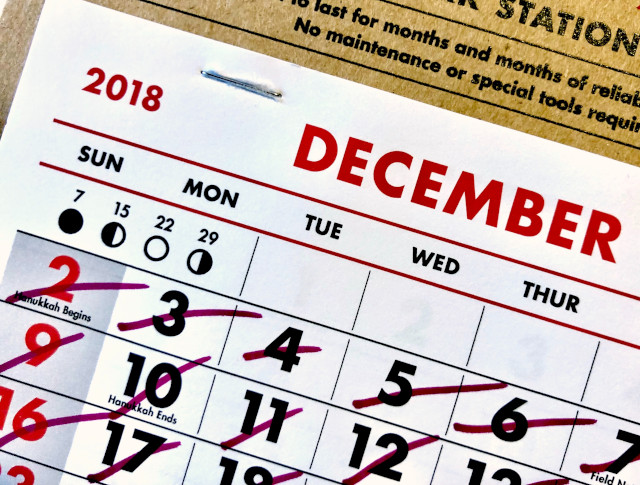

### Import libraries

In [ ]:
from datetime import datetime, timedelta
import gc
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Load data

In [ ]:
train_transaction = pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv', index_col='TransactionID')
test_transaction = pd.read_csv('../input/ieee-fraud-detection/test_transaction.csv', index_col='TransactionID')
train_identity = pd.read_csv('../input/ieee-fraud-detection/train_identity.csv', index_col='TransactionID')
test_identity = pd.read_csv('../input/ieee-fraud-detection/test_identity.csv', index_col='TransactionID')
train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)
df = pd.concat([train, test], sort=True)
del train_transaction, test_transaction, train_identity, test_identity, train, test
gc.collect();

### Browsers available

`id_31` contains browser in use during a card-not-present transaction (CNP). What are the most used browsers?

In [ ]:
x = df.groupby('id_31').id_31.count().sort_values(ascending=False).head(30)
plt.figure(figsize=(16, 10))
plt.title('Most frequent browsers in dataset')
sns.barplot(x=x, y=x.index);

There are several versions of **chrome** browser in our top of the most used browsers in this dataset. It seems a good candidate for further analysis.

### Chrome versions

List of chrome version in this dataset is a good starting point:

In [ ]:
x = [x for x in df.id_31.unique().astype(str) if 'chrome' in x]
x = df[df.id_31.isin(x)].groupby('id_31').id_31.count().sort_values(ascending=False)
plt.figure(figsize=(16, 16))
plt.title('All chrome version present in dataset')
sns.barplot(x=x, y=x.index);

We have a large set of different chrome releases ranging from version **39 to 71** and for **3 different platforms** (Desktop, Android and iOS).

### Chrome daily usage

What is the life cycle of chrome versions?

In [ ]:
df['day'] = df.TransactionDT // (3600*24)

In [ ]:
def chrome_frequency(platform):
    plt.figure(figsize=(16, 10))
    for i in range(39, 72):
        browser = f'chrome {i}.0{platform}'
        if browser in df.id_31.unique().tolist():
            z = df[df.id_31==browser].groupby('day').day.count().rename('y').reset_index()
            plt.title(f'Chrome{platform}: Count of transactions per version and per day')
            sns.lineplot(x='day', y='y', data=z, label=browser)
    plt.show()

What are the **Desktop** version of chrome used?

In [ ]:
chrome_frequency('')

We can clearly see that the **Desktop version** of Chrome is regurlarly updated by Google and users are mostly up-to date thanks to the automatic chrome updater.

I also notice that versions are not deployed immediately to all users. When a new version is relased, there is first a linear ramp-up of the number of updated users and then it is deployed to all users. This can be seen for versions 68, 69, 70 and 71. Probably Google is monitoring first updated installations to detect problems before to make a versionglobally available.

What about **Android** version?

In [ ]:
chrome_frequency(' for android')

**Android** users have mostly up-to-date chrome version on their devices. But old versions of chrome looks more frequent and older than on desktop (version 39 still in use compared to 49 on desktop).

Lastly, the second most frequent mobile system: **Apple iOS**

In [ ]:
chrome_frequency(' for ios')

**Apple** users are the small portion of users, but they are keeping their browser up-to-date as they have the smallest number of different chrome versions in the field.

From these graphs, we easily guess when a new chrome browser is relased by looking the rapid increase of the version count for each platform. Apparently this dataset covers the release date of chrome 63 to 71 for all the 3 platforms.

### Chrome release dates

A quick search on Internet and [wikipedia](https://en.wikipedia.org/wiki/Google_Chrome_version_history) in peculiar gives us the following release dates for the different versions of chrome. It is ranging from 2014 to 2019.

In [ ]:
# version, desktop, android, ios
release = pd.DataFrame([
    [39, '2014-11-18', '2014-11-12', '2014-11-24'],
    [40, '2015-01-21', '2015-01-21', '2015-01-20'],
    [41, '2015-03-03', '2015-03-11', '2015-03-16'],
    [42, '2015-04-14', '2015-04-15', '2015-04-16'],
    [43, '2015-05-19', '2015-05-27', '2015-06-01'],
    [44, '2015-07-21', '2015-07-29', '2015-07-22'],
    [45, '2015-09-01', '2015-09-01', '2015-09-02'],
    [46, '2015-10-13', '2015-10-14', '2015-10-22'],
    [47, '2015-12-01', '2015-12-02', '2015-12-02'],
    [48, '2016-01-20', '2016-01-27', '2016-01-27'],
    [49, '2016-03-02', '2016-03-09', '2016-03-09'],
    [50, '2016-04-13', '2016-04-26', '2016-04-20'],
    [51, '2016-05-25', '2016-06-01', '2016-06-01'],
    [52, '2016-07-20', '2016-07-27', '2016-07-27'],
    [53, '2016-08-31', '2016-09-07', '2016-09-07'],
    [54, '2016-10-12', '2016-10-19', '2016-10-19'],
    [55, '2016-12-01', '2016-12-06', '2016-12-05'],
    [56, '2017-01-25', '2017-02-01', '2017-02-01'],
    [57, '2017-03-09', '2017-03-16', '2017-03-14'],
    [58, '2017-04-19', '2017-04-20', '2017-04-25'],
    [59, '2017-06-05', '2017-06-06', '2017-06-06'],
    [60, '2017-07-25', '2017-07-31', '2017-07-25'],
    [61, '2017-09-05', '2017-09-05', '2017-09-05'],
    [62, '2017-10-17', '2017-10-19', '2017-10-18'],
    [63, '2017-12-06', '2017-12-05', '2017-12-05'],
    [64, '2018-01-24', '2018-01-23', '2018-01-24'],
    [65, '2018-03-06', '2018-03-06', '2018-03-06'],
    [66, '2018-04-17', '2018-04-17', '2018-04-17'],
    [67, '2018-05-29', '2018-05-31', '2018-05-29'],
    [68, '2018-07-24', '2018-07-24', '2018-07-24'],
    [69, '2018-09-04', '2018-09-04', '2018-09-04'],
    [70, '2018-10-16', '2018-10-17', '2018-10-16'],
    [71, '2018-12-04', '2018-12-04', '2018-12-04'],
    [72, '2019-01-29', '2019-01-29', '2019-01-29'],],
    columns=['version', 'desktop', 'android', 'ios'])

### Estimate dataset start point for each chrome version

We can now estimate the `TransactionDT` associated with the release date of chrome 63 to 71 by taking the smallest `TransactionDT` for each of these versions in the dataset.

In [ ]:
result = pd.DataFrame(columns=['browser', 'first_day'])
for col, platform in enumerate(['', ' for android', ' for ios']):
    for i in range(63, 72):
        browser = f'chrome {i}.0{platform}'
        if browser in df.id_31.unique().tolist():
            shift = df[df.id_31 == browser].TransactionDT.min() // (3600*24)
            release_date = release.iloc[i-39][col+1]
            result = result.append({
                'browser': browser,
                'first_day': datetime.strptime(release_date, '%Y-%m-%d') - timedelta(days=shift),
                'version': i
            }, ignore_index=True)

result

### And the origin is...

To reduce outliners influence, we'll take the median of estimated dates. Therefore we estimate *the beginning of time* for this dataset is around **28th november 2017**:

In [ ]:
result.first_day.quantile(.5)

### Conclusion

We were supposing in our analysis that all users were using the ["stable" channel](https://www.chromium.org/getting-involved/dev-channel) of chrome browser to determine this dataset's starting date. But if a single user is using a "beta", "dev" or "canary" channel version of chrome our estimation is biased. These non-"stable" channel versions are generally released before the "stable" version, then our estimate will be biased to an earlier date than the right one.

This date is close to what other kagglers found (30th november) by considering days with highest peaks as christmas or cybermonday.


I hope you enjoyed reading this notebook as much as I am while writing it. I let the reader do the same analysis with other browsers like **safari** or **firefox** as an exercice.

Take care and Happy kaggling! 👍